<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 4</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

## **Contenidos**

1. [**Tutorial:** La convolución circular](#convolucion)
   1. [Definición](#definicion)
   2. [Representación matricial](#matriz-convolucion)
   3. [Ejemplo en dimensión baja](#low-dim)
   4. [Ejemplo en dimensión alta](#high-dim)
   5. [Ejemplo en imágenes](#image)

In [1]:
# imports
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

<h2 id='convolucion'> <b>Tutorial:</b> La convolución circular </h2>

**NOTA:** En este tutorial indexamos las componentes de un vector en $\mathbb{R}^d$ desde 0 hasta $d-1$. De este modo, si $x\in \mathbb{R}^d$ entonces
$$
    x = \begin{bmatrix} x_0 \\ \vdots \\ x_{d-1} \end{bmatrix}.
$$

Recordamos además la operación **residuo**. Si $d$ y $n$ son números naturales, entonces el residuo de $n$ dividido por $d$ es el número $r\in \{0,\ldots, d-1\}$ tal que
$$
    n = m d + r
$$
para algún número natural $m$. En otras palabras, es el residuo de la división entre números naturales.

El residuo de $n$ dividido por $d$ habitualmente se denomina $\text{rem}(n, d)$. Esto nos permite definir la operación $\mod d$. 

Si $n$ es un **entero** entonces
$$
    n \mod d = \begin{cases}
        \text{rem}(n, d) & \text{si $n \geq 0$}\\
        d - \text{rem}(n, d) & \text{si $n < 0$}.
    \end{cases}
$$
La operación $\mod d$ se puede calcular con la función ``numpy.mod``.

<h3 id='definicion'> Definición </h3>

La **convolución circular** es una operación que asocia a dos vectores de igual tamaño un vector con el mismo tamaño. Conceptualmente, calcula una **suma ponderada móvil** usando como ponderadores las componentes de un vector, y como valores las componentes del otro.

Dados vectores $h, x\in \mathbb{R}^d$ su convolución circular es el vector
$$
    (h \,\textcircled{\ast}\, x)_i = \sum_{j=0}^{d-1} x_j h_{i-j \mod d}\quad\text{para}\quad i\in \{0,\ldots, d-1\}.
$$
En este caso, el vector $h$ se denomina el *núcleo* ó *filtro*.

<h3 id='matriz-convolucion'> Representación matricial </h3>

Podemos representar esta operación usando el **producto matriz-vector**. Vemos que
$$
    \begin{bmatrix}(h \,\textcircled{\ast}\, x)_0 \\ (h \,\textcircled{\ast}\, x)_1 \\ \vdots \\ (h \,\textcircled{\ast}\, x)_{d-2} \\ (h \,\textcircled{\ast}\, x)_{d-1} \end{bmatrix} = \begin{bmatrix} h_0 x_0 + h_{d-1} x_1 + \ldots + h_{2} x_{d-2} + h_{1} x_{d-1} \\ h_{1} x_1 + h_{0} x_2 + \ldots + h_{3} x_{d-1} + h_{2} x_d \\ \vdots \\ h_{d-2} x_0 + h_{d-3} x_1 + \ldots + h_{0} x_{d-2} + h_{d-1} x_{d-1} \\ h_{d-1} x_0 + h_{d-2} x_1 + \ldots + h_{1} x_{d-2} + h_{0} x_{d-1} \end{bmatrix}.
$$
Esta expresión se puede representar como el producto matriz-vector
$$
    \begin{bmatrix}(h \,\textcircled{\ast}\, x)_0 \\ (h \,\textcircled{\ast}\, x)_1 \\ \vdots \\ (h \,\textcircled{\ast}\, x)_{d-2} \\ (h \,\textcircled{\ast}\, x)_{d-1} \end{bmatrix} = 
    \begin{bmatrix} h_0 & h_{d-1} & \ldots & h_{2} & h_{1} \\ h_{1} & h_{0} & \ldots & h_{3} & h_{2} & \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ h_{d-2} & h_{d-3} & \ldots & h_{0} & h_{d-1} \\ h_{d-1} & h_{d-2} & \ldots & h_{1} & h_{0} \end{bmatrix}\begin{bmatrix} x_0 \\ x_2 \\ \vdots \\ x_{d-2} \\ x_{d-1} \end{bmatrix}.
$$
Esto nos lleva a definir la matriz de $d\times d$
$$
    H = \begin{bmatrix} h_0 & h_{d-1} & \ldots & h_{2} & h_{1} \\ h_{1} & h_{0} & \ldots & h_{3} & h_{2} & \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ h_{d-2} & h_{d-3} & \ldots & h_{0} & h_{d-1} \\ h_{d-1} & h_{d-2} & \ldots & h_{1} & h_{0} \end{bmatrix}.
$$
Una matriz con esta estructura se llama **matriz circulante**.

Concluimos que la convolución no es mas que el producto matriz-vector
$$
    h \,\textcircled{\ast}\, x = H x.
$$

<h3 id='low-dim'> Ejemplo en dimensión baja </h3>

Implementamos la convolución primero en dimensión baja para ver cuál es su efecto. Escogemos $d= 32$.

In [2]:
# dimensión
d = 32
# variable auxiliar
s = np.linspace(0, 1, d, endpoint=False)
n = np.linspace(0, d-1, d)

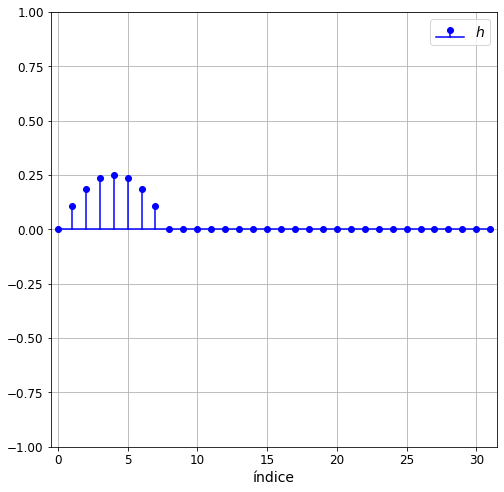

In [3]:
# filtro h
h = 16 * np.maximum(0.0, s * (0.25 - s))

# formamos la matriz H
H = np.zeros((d, d), dtype=float)
for I in range(d):
    for J in range(d):
        # note el uso de la función numpy.mod
        H[I, J] = h[np.mod(I-J, d)]

plt.figure(figsize=(8, 8))
plt.stem(n, h, label='$h$', basefmt='b-', linefmt='b-', markerfmt='bo')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [4]:
print('Vector h')
print(h)
print('Matriz H')
print(H)

Vector h
[0.       0.109375 0.1875   0.234375 0.25     0.234375 0.1875   0.109375
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
Matriz H
[[0.       0.       0.       ... 0.234375 0.1875   0.109375]
 [0.109375 0.       0.       ... 0.25     0.234375 0.1875  ]
 [0.1875   0.109375 0.       ... 0.234375 0.25     0.234375]
 ...
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.109375 0.       0.      ]
 [0.       0.       0.       ... 0.1875   0.109375 0.      ]]


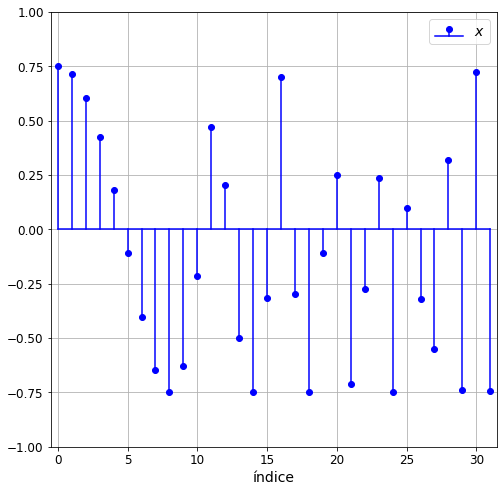

In [5]:
# vector x
x = 0.75 * (1 - 2 * np.abs(np.sin((5 * s) ** 2)))

plt.figure(figsize=(8, 8))
plt.stem(n, x, label='$x$', basefmt='b-', linefmt='b-', markerfmt='bo')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

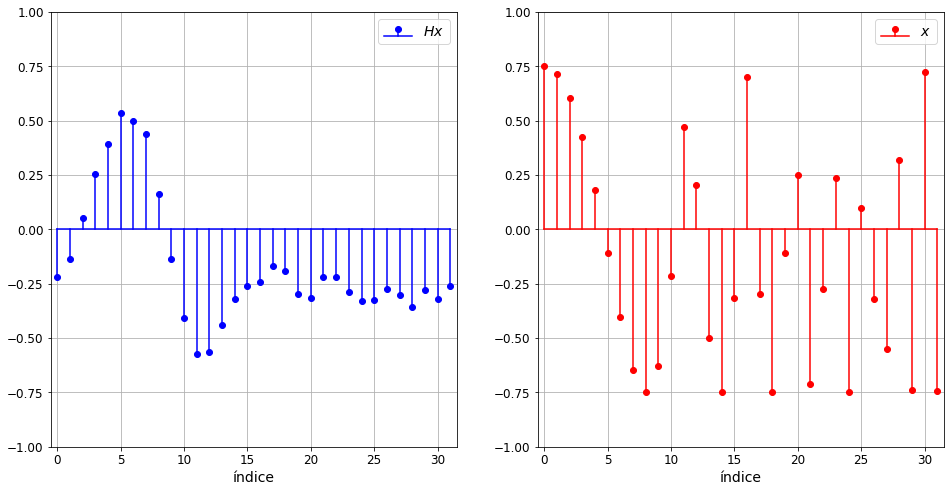

In [6]:
# convolución

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.stem(n, H @ x, label='$H x$', basefmt='b-', linefmt='b-', markerfmt='bo')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 2, 2)
plt.stem(n, x, label='$x$', basefmt='r-', linefmt='r-', markerfmt='ro')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h3 id='high-dim'> Ejemplo en dimensión alta </h3>

En dimensión alta resulta ineficiente formar la matriz $H$. Sin embargo, existen rutinas **computacionalmente eficientes** que nos permiten calcular la convolución circular. 

Presentamos un ejemplo en dimensión $d = 65536$.

In [7]:
# dimensión
d = 2 ** 16
# variable auxiliar
s = np.linspace(0, 1, d, endpoint=False)
n = np.linspace(0, d-1, d)

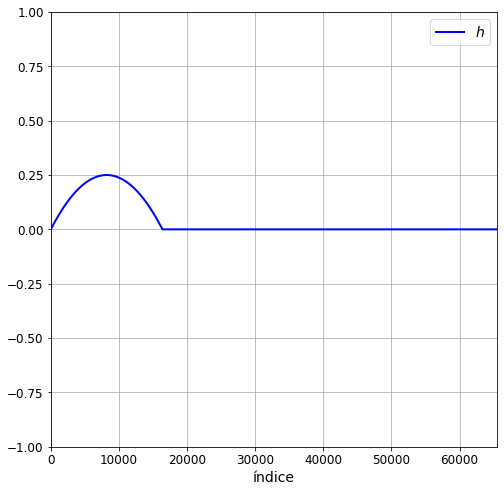

In [8]:
# filtro h
h = 16 * np.maximum(0.0, s * (0.25 - s))

plt.figure(figsize=(8, 8))
plt.plot(n, h, label='$h$', linewidth=2, linestyle='-', color='b')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

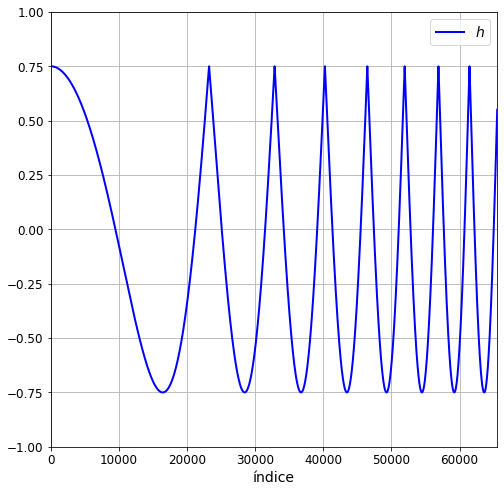

In [9]:
# vector x
x = 0.75 * (1 - 2 * np.abs(np.sin((5 * s) ** 2)))

plt.figure(figsize=(8, 8))
plt.plot(n, x, label='$h$', linewidth=2, linestyle='-', color='b')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [10]:
# calculo rápido de la convolución circular
Hx = np.real(np.fft.ifft(np.fft.fft(h) * np.fft.fft(x)))

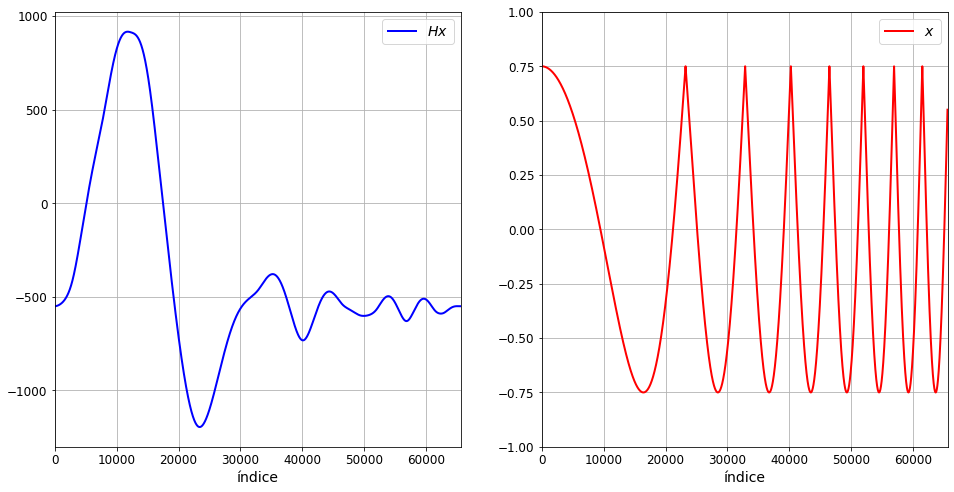

In [11]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(n, Hx, label='$H x$', linewidth=2, linestyle='-', color='b')
plt.xlim([ -0.5, d - 0.5 ])
# plt.ylim([ -d, d ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(n, x, label='$x$', linewidth=2, linestyle='-', color='r')
plt.xlim([ -0.5, d - 0.5 ])
plt.ylim([ -1.0, 1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h3 id='image'> Ejemplo en imágenes </h3>

La convolución circular también se puede definir para imágenes. Esto nos permite, por ejemplo, suavizar la imagen.

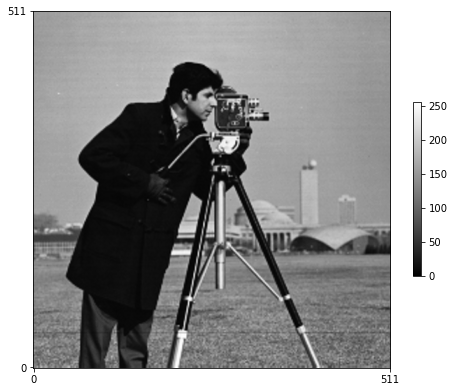

In [12]:
# importamos ejemplos
import pywt.data
# imagen
X = np.flipud(pywt.data.camera())
# número de pixeles
N = X.shape[0]

plt.figure(figsize=(8, 8))
plt.imshow(X, vmin=0.0, vmax=255, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

En este caso, podemos usar un filtro similar al del ejemplo en una dimensión.

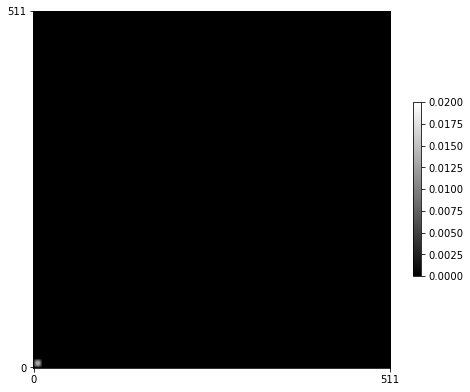

In [13]:
# variable auxiliar
s = np.linspace(0, 1, N, endpoint=False)
[ sx, sy ] = np.meshgrid(s, s)
# filtro
H = np.maximum(0.0, sx * (0.025 - sx)) * np.maximum(0.0, sy * (0.025 - sy))
H = H / np.sum(H)

plt.figure(figsize=(8, 8))
plt.imshow(H, vmin=0.0, vmax=0.02, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

In [14]:
# calculo rápido de la convolución circular
HX = np.real(np.fft.ifft2(np.fft.fft2(H) * np.fft.fft2(X)))

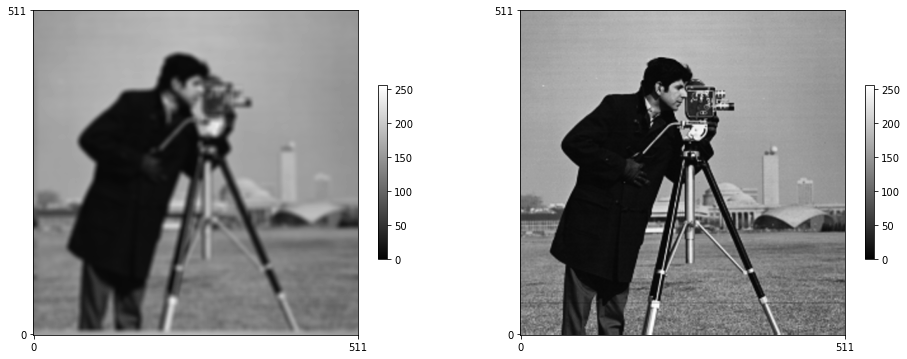

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(HX, vmin=0.0, vmax=255, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 2, 2)
plt.imshow(X, vmin=0.0, vmax=255, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()